In [1]:
from aqua import Reader,catalogue, inspect_catalogue
# import sys
# sys.path.append("../")
import os
os.chdir("../")
import global_ocean_func as fn
import matplotlib.pyplot as plt

FDB5 binary library not present on system, disabling FDB support.


In [2]:
reader = Reader(model='FESOM', exp='tco2559-ng5-cycle3', source="lra-r100-monthly")
yearly_data = reader.retrieve()[["ocpt","so"]].resample(time="Y").mean()

yearly_data=yearly_data.rename({"nz1":"lev"})
yearly_data=yearly_data.rename({"ocpt":"thetao"})
# data=data[["thetao","so"]]

# yearly_data=data.resample(time="Y").mean()
yearly_data

<xarray.Dataset>
Dimensions:  (time: 5, lev: 69, lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lev      (lev) float64 2.5 7.5 12.5 17.5 ... 5.525e+03 5.825e+03 6.175e+03
  * time     (time) datetime64[ns] 2020-12-31 2021-12-31 ... 2024-12-31
Data variables:
    thetao   (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>
    so       (time, lev, lat, lon) float64 dask.array<chunksize=(1, 69, 180, 360), meta=np.ndarray>

In [3]:
global_mean_anom_wrt_initial=fn.std_anom_wrt_initial(yearly_data, use_predefined_region=True, region="Global Ocean").transpose()
global_mean_anom_wrt_time_mean=fn.std_anom_wrt_time_mean(yearly_data, use_predefined_region=True, region="Global Ocean").transpose()


(5500.0, 0.0)

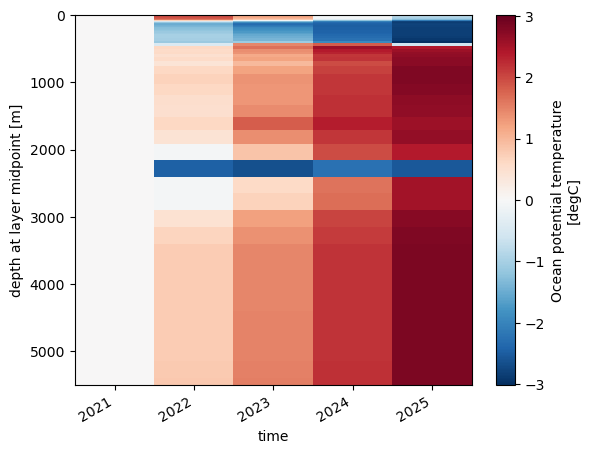

In [4]:
global_mean_anom_wrt_initial.thetao.plot()
plt.ylim((5500,0))

(5500.0, 0.0)

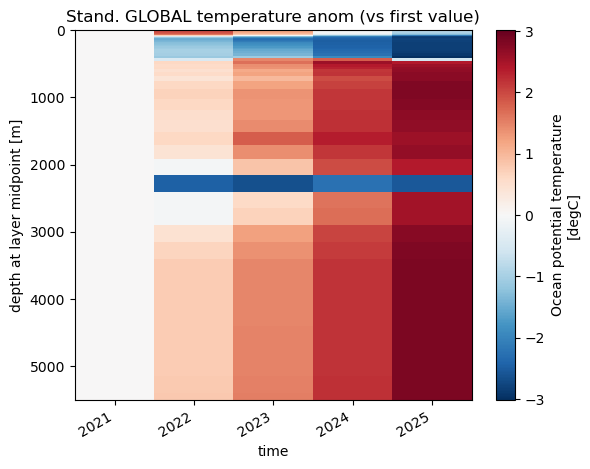

In [5]:
global_mean_anom_wrt_initial.thetao.plot()

plt.title("Stand. GLOBAL temperature anom (vs first value)")
plt.ylim((5500,0))

(5500.0, 0.0)

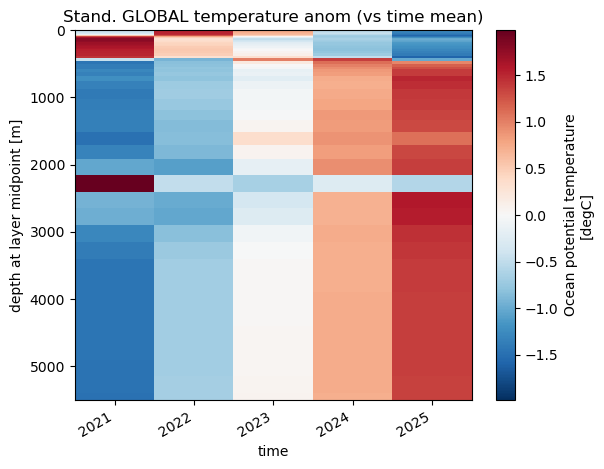

In [6]:
global_mean_anom_wrt_time_mean.thetao.plot()

plt.title("Stand. GLOBAL temperature anom (vs time mean)")
plt.ylim((5500,0))

2023-06-30 01:54:11,825 - INFO - ./output/TS_time_series_anomalies_stand_global__anom_(vs_initial_value).png saved


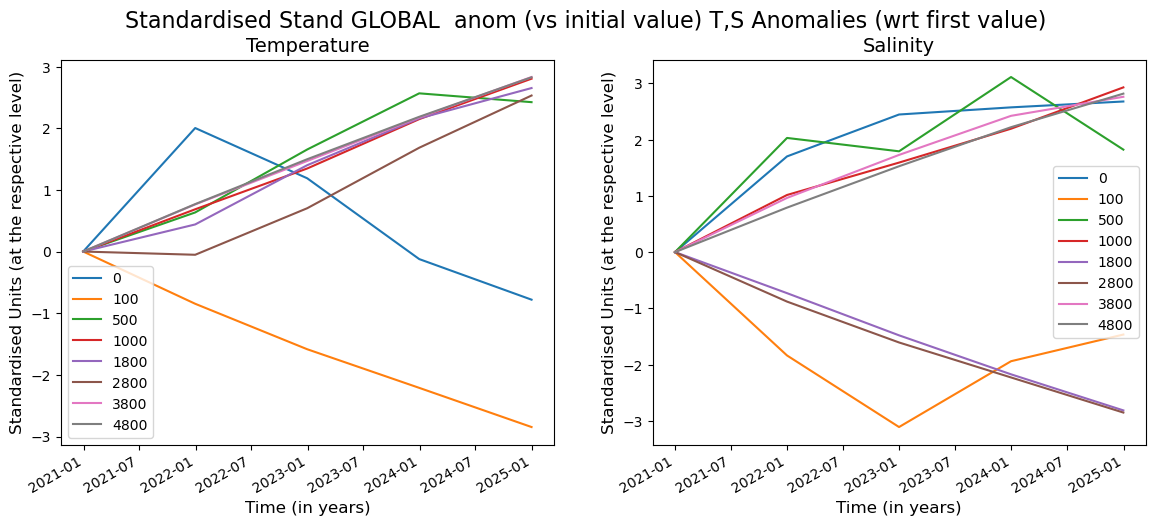

2023-06-30 01:55:16,311 - INFO - ./output/TS_time_series_anomalies_"stand_global__anom_(vs_time_mean).png saved


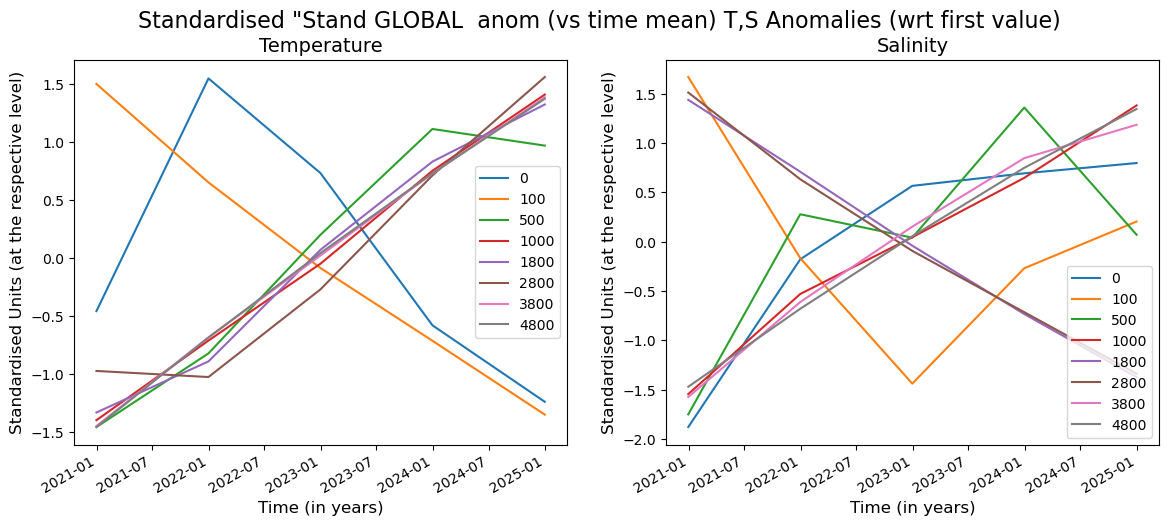

In [7]:
fn.time_series(global_mean_anom_wrt_initial,'Stand GLOBAL  anom (vs initial value)')
fn.time_series(global_mean_anom_wrt_time_mean,'"Stand GLOBAL  anom (vs time mean)')

2023-06-30 02:02:12,433 - INFO - ./output/TS_global_ocean_mean.png saved


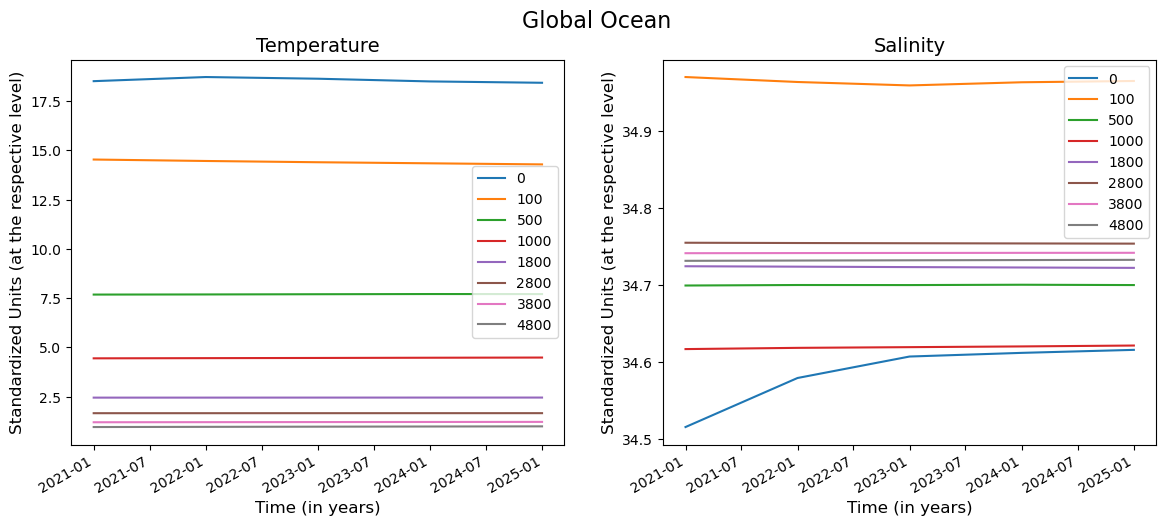

In [4]:
fn.mean_value_plot(yearly_data,"Global Ocean")